                                            App         Category  Rating  \
0                       Ak Parti Yardım Toplama           SOCIAL     NaN   
1                    Ain Arabic Kids Alif Ba ta           FAMILY     NaN   
2  Popsicle Launcher for Android P 9.0 launcher  PERSONALIZATION     NaN   
3                     Command & Conquer: Rivals           FAMILY     NaN   
4                                    CX Network         BUSINESS     NaN   

   Reviews  Size_MBs Installs  Type   Price Content_Rating           Genres  \
0        0       8.7        0  Paid  $13.99           Teen           Social   
1        0      33.0        0  Paid   $2.99       Everyone        Education   
2        0       5.5        0  Paid   $1.49       Everyone  Personalization   
3        0      19.0        0   NaN       0   Everyone 10+         Strategy   
4        0      10.0        0  Free       0       Everyone         Business   

     Last_Updated         Android_Ver  
0   July 28, 2017          4

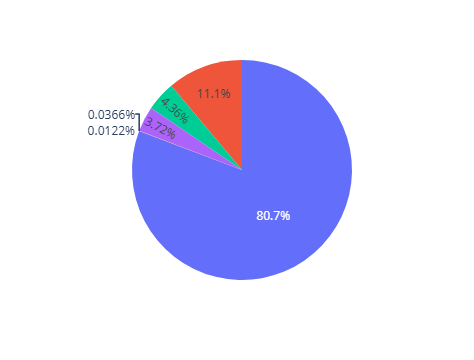

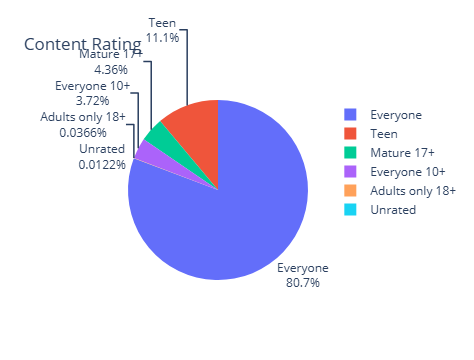

count          8197
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object
                App
Installs           
1                 3
1,000           697
1,000,000      1417
1,000,000,000    20
10               69
10,000          987
10,000,000      933
100             303
100,000        1096
100,000,000     189
5                 9
5,000           425
5,000,000       607
50               56
50,000          457
50,000,000      202
500             199
500,000         504
500,000,000      24
                                 App   Category  Rating  Reviews   Size_MBs  \
3946        I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7.300000   
3221                  I am Rich Plus     FAMILY     4.0      856   8.700000   
3554                      💎 I'm rich  LIFESTYLE     3.8      718  26.000000   
2775                   I Am Rich Pro     FAMILY     4.4      201   2.700000   
5765                       I am rich  LIFESTYLE     3.8     3547   1.800000

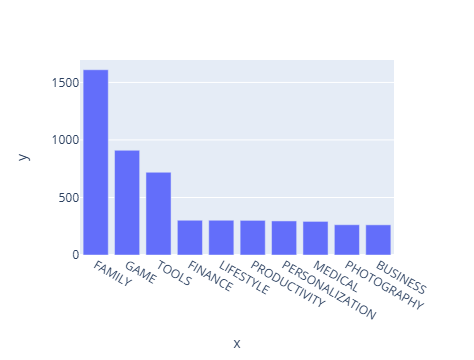

                        Installs
Category                        
ART_AND_DESIGN         114233100
AUTO_AND_VEHICLES       53129800
BEAUTY                  26916200
BOOKS_AND_REFERENCE   1665791655
BUSINESS               692018120
COMICS                  44931100
COMMUNICATION        11039241530
DATING                 140912410
EDUCATION              352852000
ENTERTAINMENT         2113660000
EVENTS                  15949410
FAMILY                4437579590
FINANCE                455312400
FOOD_AND_DRINK         211677750
GAME                 13858762717
HEALTH_AND_FITNESS    1134006220
HOUSE_AND_HOME          97082000
LIBRARIES_AND_DEMO      52083000
LIFESTYLE              503742120
MAPS_AND_NAVIGATION    503267560
MEDICAL                 39162676
NEWS_AND_MAGAZINES    2369110650
PARENTING               31116110
PERSONALIZATION       1532341930
PHOTOGRAPHY           4649143130
PRODUCTIVITY          5788070180
SHOPPING              1400331540
SOCIAL                5487841475
SPORTS    

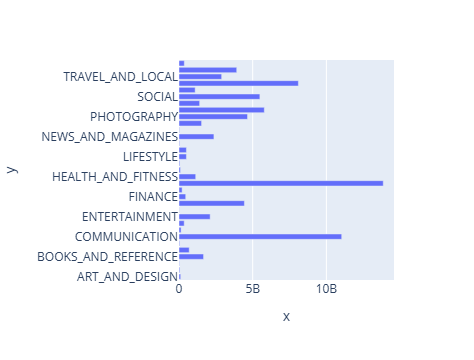

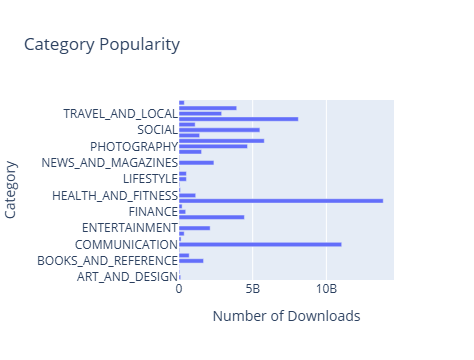

We now have a single column with shape: (8577,)
Number of genres: 53
                        App
Category          Type     
ART_AND_DESIGN    Free   58
                  Paid    3
AUTO_AND_VEHICLES Free   72
                  Paid    1
BEAUTY            Free   42


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

data = pd.read_csv("apps.csv")
print(data.head())
print(data.shape)

#Removing NAN values

data.isna().values.any()
data = data.dropna()

print(data.describe())

print(data.sample())

#Movie with less review

lessreview = data.groupby("Category").count()
print(lessreview)
print(lessreview["Price"].max())

data = data.drop(['Last_Updated', 'Android_Ver'], axis = 1)
print(data.head())

duplicated_rows = data[data.duplicated()]
print(duplicated_rows.shape)
print(duplicated_rows.head())

data = data.drop_duplicates(subset = ['App','Type','Price'])
print(data)

duplicated_rows = data[data.duplicated()]
print(duplicated_rows.shape)
print(duplicated_rows.head())

data[data.App == 'Instagram']

#Max rating
print(data.sort_values('Rating', ascending=False).head())
#Max Reviews
print(data.sort_values('Size_MBs', ascending=False).head())
#Max review
print(data.sort_values('Reviews', ascending=False).head(50))

#Number of occurences
ratings = data["Content_Rating"].value_counts()
print(ratings)

fig = px.pie(labels = ratings.index, values = ratings.values)
fig.show()

fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating",
names=ratings.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')
 
fig.show()

print(data["Installs"].describe())

print(data[["App", "Installs"]].groupby("Installs").count())

data.Installs = data.Installs.astype(str).str.replace(',', "")
data.Installs = pd.to_numeric(data.Installs)
data[['App', 'Installs']].groupby('Installs').count()

data["Price"] = data["Price"].str.replace(r'[^\d.]', '', regex=True) 
data["Price"] = pd.to_numeric(data["Price"])
max_price = data.sort_values(by = "Price", ascending = False).head(20)
print(max_price)

#To find unique catgeories

uniq = data.Category.nunique()
print(uniq)

#number of apps per category

noofapps = data["Category"].value_counts()[:10]
noofapps

bar = px.bar(x = noofapps.index,
             y = noofapps.values)
bar.show()

#no of category download

category_installs = data.groupby("Category").agg({'Installs':pd.Series.sum})
category_installs.sort_values('Installs',ascending = True)

print(catgeory_installs)

h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h')
 
h_bar.show()

h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h',
               title='Category Popularity')
 
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()




# Split the strings on the semi-colon and then .stack them.
stack = data.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

data_freevspaid = data.groupby(['Category', 'Type']).agg({'App':pd.Series.count})
print(data_freevspaid.head())